<a href="https://colab.research.google.com/github/PedroReste/modelos-de-previsao-para-churn/blob/main/Notebooks/analise_exploratoria_de_dados_de_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Esse dataset sobre E-Commerce é originado do [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction) e também disponível no [meu Github](https://github.com/PedroReste/modelos-de-previsao-para-churn/tree/main/Bases%20de%20Dados).
Essa base de dados foi disponibilizada para realziar modelos de previsão de churn.

No entanto, antes de produzir modelos, é essêncial que seja feita uma análise exploratória para entender os dados disponíveis e quais são relevantes para serem utilizados dentro do modelo.

Podendo existir mais de um agrupamento de dados para testarmos depois.

****
**Colunas do Dataset**
> Uma breve descrição de cada variáveis antes de começarmos a explorar os dados.

- **CustomerID**: Identificador único para os clientes.
- **Churn**: Variável dummy: "0" para clientes que permanecem na base da empresa (*no-churners*) e "1" para clientes que deixaram os produtos ou serviços da empresa (*churners*).
- **Tenure**: Tempo que o cliente está na base de dados nesse recorte de dados (imagino que esteja em meses).
- **PreferredLoginDevice**: Disposito de preferência para fazer login.
- **CityTier**: Nível da cidade *(não tem uma descrição tão aprofunda no Kaggle, imagino que se trate da quantidade populacional da cidade)*.
- **WarehouseToHome**: Distância entre o armázem e a casa do cliente.
- **PreferredPaymentMode**: Forma de pagamento preferencial.
- **Gender**: Gênero do cliente.
- **HourSpendOnApp**: Total de horas gastos no aplicativo ou no site do e-commerce.
- **NumberOfDeviceRegistered**: Total de dispositivos registrados.
- **PreferedOrderCat**: Categoria de produtos de preferência de pedidos no últimos mês.
- **SatisfactionScore**: Nível de Sastifação do Cliente.
- **MaritalStatus**: Estado civil.
- **NumberOfAddress**: Total de endereços registrados por um cliente.
- **Complain**: Se houve reclamações no último mês, "0" para não e "1" para sim.
- **OrderAmountHikeFromlastYear**: Percentual de crescimento no total de pedidos em compração ao último ano.
- **CouponUsed**: Total de cupons usados no último mês.
- **OrderCount**: Total de pedidos no último mês.
- **DaySinceLastOrder**: Total de dias desde do último pedido.
- **CashbackAmount**: Valor médio do cashback no último mês.
****

In [1]:
import pandas as pd
raw = "https://raw.githubusercontent.com/PedroReste/modelos-de-previsao-para-churn/main/Bases%20de%20Dados/ecommerce_dataset_sem_tratamento.csv"
df = pd.read_csv(raw, sep=";")

In [2]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [4]:
#Verificando o tipo de cada coluna
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [5]:
df.shape

(5630, 20)

In [6]:
#Valores faltantes em cada coluna
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
#Proporção da base entre churners e não churners
print(f"Dentro do dataset não tratado, existem {df.shape[0]} observações e {df.shape[1]} colunas.")
print(f"Pensando em uma análise de churn, existem {df['Churn'].value_counts()[0]} clientes que permanceram na base, representando {((df['Churn'].value_counts()[0]/df.shape[0]) * 100).round(1)}% da base de dados.")
print(f"Enquanto existem {df['Churn'].value_counts()[0]} clientes que deixaram a base, representando {((df['Churn'].value_counts()[1]/df.shape[0]) * 100).round(1)}% na base de dados.")

Dentro do dataset não tratado, existem 5630 observações e 20 colunas.
Pensando em uma análise de churn, existem 4682 clientes que permanceram na base, representando 83.2% da base de dados.
Enquanto existem 4682 clientes que deixaram a base, representando 16.8% na base de dados.


In [8]:
#A quantitade de nulls para usuários não-churners
df[df["Churn"]==0].isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         183
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                167
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 197
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    251
CouponUsed                     248
OrderCount                     240
DaySinceLastOrder              253
CashbackAmount                   0
dtype: int64

In [9]:
#A quantitade de nulls para usuários churners
df[df["Churn"]==1].isnull().sum()

CustomerID                      0
Churn                           0
Tenure                         81
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                84
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                 58
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    14
CouponUsed                      8
OrderCount                     18
DaySinceLastOrder              54
CashbackAmount                  0
dtype: int64

Pela quantidade de valores nulos que existem em comparação ao total de linhas, vou optar remover os mesmos porque não parece que irá afetar a base de dados em relação ao total.

In [10]:
#Removendo os valores null
df.dropna(inplace=True)

In [11]:
#Proporção da base entre churners e não churners
print(f"Pós limpeza de dados nulos, permanceram {df.shape[0]} observações.")
print(f"São {df['Churn'].value_counts()[0]} clientes que permanceram na base, representando {((df['Churn'].value_counts()[0]/df.shape[0]) * 100).round(1)}% da base de dados.")
print(f"E {df['Churn'].value_counts()[0]} clientes que deixaram a base, representando {((df['Churn'].value_counts()[1]/df.shape[0]) * 100).round(1)}% na base de dados.")
print("Não houve uma alteração na proporção de churners e não-churners.")

Pós limpeza de dados nulos, permanceram 3774 observações.
São 3143 clientes que permanceram na base, representando 83.3% da base de dados.
E 3143 clientes que deixaram a base, representando 16.7% na base de dados.
Não houve uma alteração na proporção de churners e não-churners.


Após fazer a limpeza de dados nulos, focar um pouco nas variáveis categoricas e suas características

In [12]:
#Conferindo os dados únicos das variáveis que são strings
colunas_string = df.select_dtypes(include=['object']).columns

for coluna in colunas_string:
    valores_unicos = df[coluna].unique()
    print(f"Valores únicos na coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos na coluna 'PreferredLoginDevice':
['Mobile Phone' 'Phone' 'Computer']

Valores únicos na coluna 'PreferredPaymentMode':
['Debit Card' 'COD' 'CC' 'Credit Card' 'E wallet' 'UPI' 'Cash on Delivery']

Valores únicos na coluna 'Gender':
['Female' 'Male']

Valores únicos na coluna 'PreferedOrderCat':
['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Mobile' 'Others' 'Grocery']

Valores únicos na coluna 'MaritalStatus':
['Single' 'Divorced' 'Married']



In [13]:
#Verificar a quantidade para cada valor nessas colunas
for coluna in colunas_string:
    quantidade = df[coluna].value_counts()
    print(f"Coluna: '{coluna}':")
    print(quantidade)
    print()

Coluna: 'PreferredLoginDevice':
Mobile Phone    1936
Computer        1111
Phone            727
Name: PreferredLoginDevice, dtype: int64

Coluna: 'PreferredPaymentMode':
Debit Card          1538
Credit Card         1124
E wallet             443
COD                  301
UPI                  285
Cash on Delivery      48
CC                    35
Name: PreferredPaymentMode, dtype: int64

Coluna: 'Gender':
Male      2271
Female    1503
Name: Gender, dtype: int64

Coluna: 'PreferedOrderCat':
Laptop & Accessory    1961
Mobile Phone          1227
Fashion                443
Mobile                 119
Others                  18
Grocery                  6
Name: PreferedOrderCat, dtype: int64

Coluna: 'MaritalStatus':
Married     1982
Single      1245
Divorced     547
Name: MaritalStatus, dtype: int64



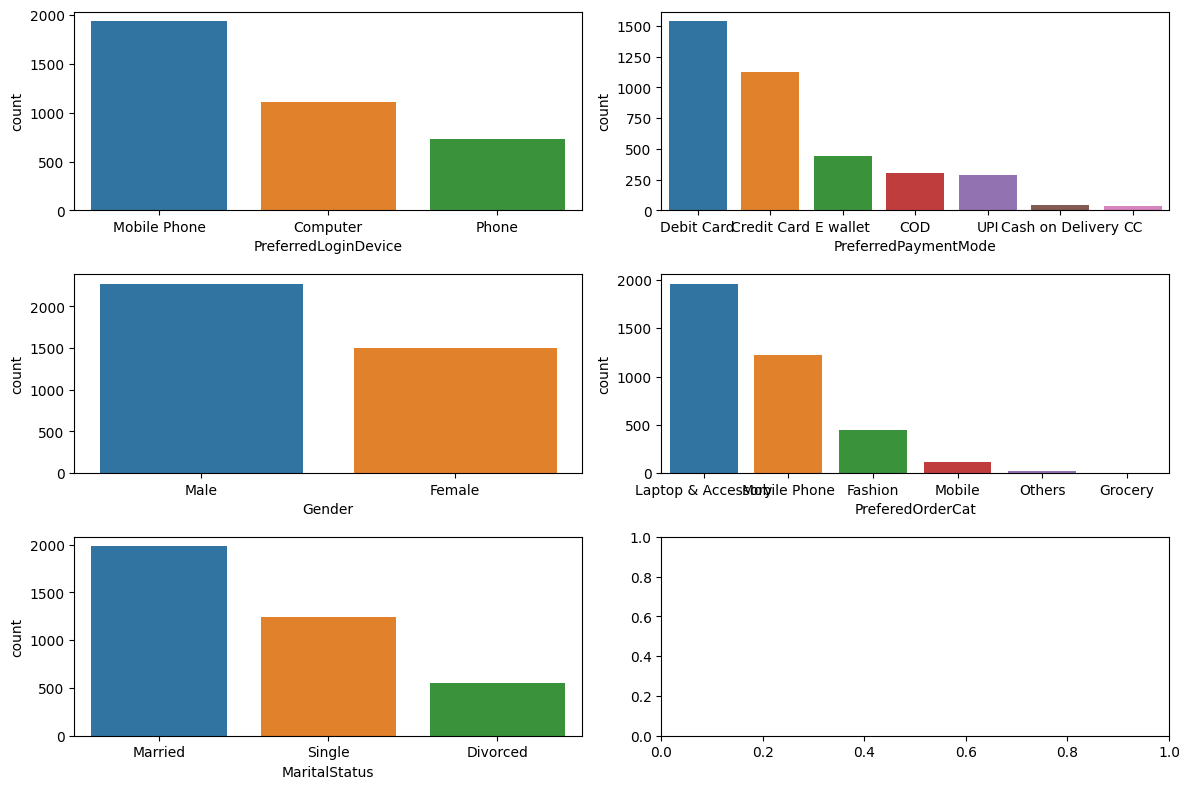

In [14]:
#Gerando gráficos para melhorar a visualização
import matplotlib.pyplot as plt
import seaborn as sns

fig, axarr = plt.subplots(3, 2, figsize=(12, 8))
sns.countplot(x=colunas_string[0], data = df, ax=axarr[0][0],\
              order = df[colunas_string[0]].value_counts().index)
sns.countplot(x=colunas_string[1], data = df, ax=axarr[0][1],\
              order = df[colunas_string[1]].value_counts().index)

sns.countplot(x=colunas_string[2], data = df, ax=axarr[1][0],\
              order = df[colunas_string[2]].value_counts().index)
sns.countplot(x=colunas_string[3], data = df, ax=axarr[1][1],\
              order = df[colunas_string[3]].value_counts().index)

sns.countplot(x=colunas_string[4], data = df, ax=axarr[2][0],\
              order = df[colunas_string[4]].value_counts().index)

plt.tight_layout()
plt.show()

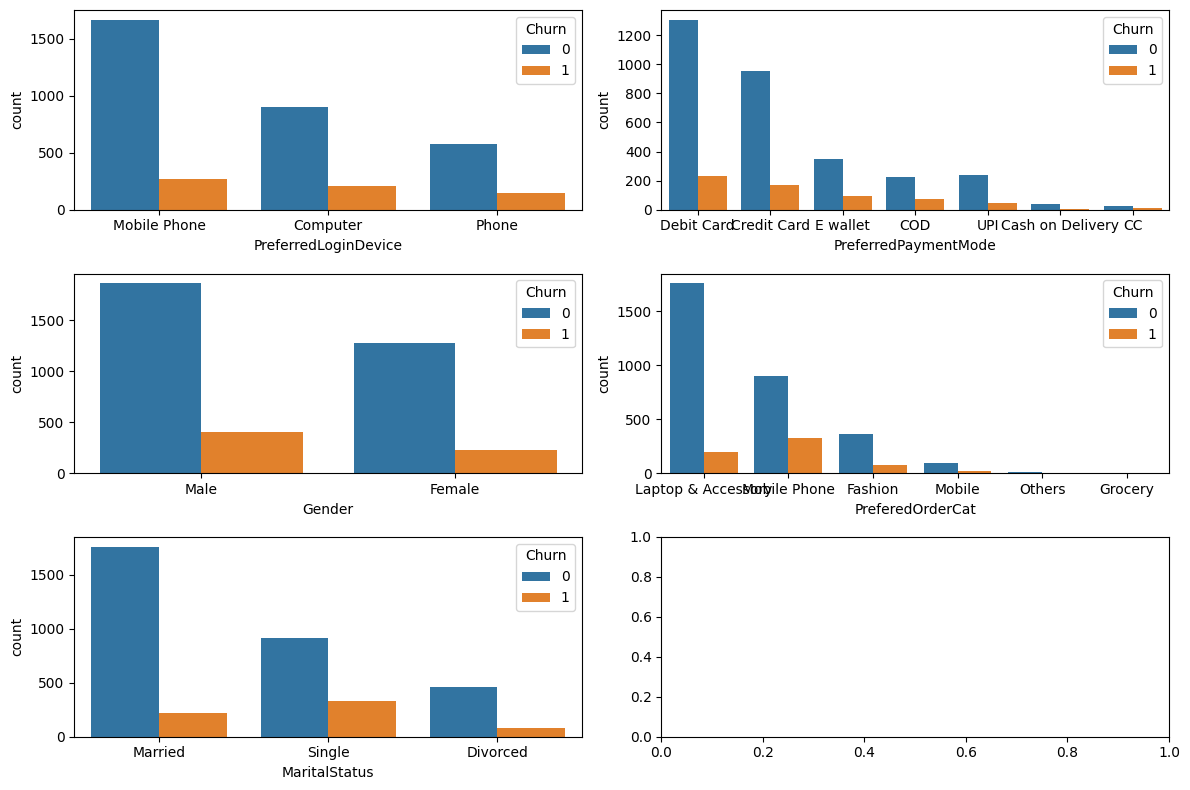

In [15]:
#Segmentando pelo Churn
fig, axarr = plt.subplots(3, 2, figsize=(12, 8))
sns.countplot(x=colunas_string[0], hue="Churn", data = df, ax=axarr[0][0],\
              order = df[colunas_string[0]].value_counts().index)
sns.countplot(x=colunas_string[1], hue="Churn", data = df, ax=axarr[0][1],\
              order = df[colunas_string[1]].value_counts().index)

sns.countplot(x=colunas_string[2], hue="Churn", data = df, ax=axarr[1][0],\
              order = df[colunas_string[2]].value_counts().index)
sns.countplot(x=colunas_string[3], hue="Churn", data = df, ax=axarr[1][1],\
              order = df[colunas_string[3]].value_counts().index)

sns.countplot(x=colunas_string[4], hue="Churn", data = df, ax=axarr[2][0],\
              order = df[colunas_string[4]].value_counts().index)

plt.tight_layout()
plt.show()

****
- Na coluna **"PreferredLoginDevice"**, parece que o "Mobile Phone" e "Phone" se tratam da mesma coisa, vou agrupar em um mesmo valor.
- Parece que ocorre o mesmo para coluna **"PreferedOrderCat"** com "Mobile Phone" e "Phone", além de agrupar o "Grocery" com "Others".
- Para **"MaritalStatus"**, não existe uma diferença efetiva entre "Sigle" e "Divorced", vou tornar todos como "Single".
- Na coluna **"PreferredPaymentMode"** está com valores que na verdade são a mesma coisa, como "COD"e "Cash On Deleviry" e "CC" e "Credit Card".
****

In [16]:
#Subistituindo os valores nas colunas
df["PreferredLoginDevice"].replace(to_replace="Phone", value="Mobile Phone", inplace=True)

df["PreferedOrderCat"].replace(to_replace="Mobile", value="Mobile Phone", inplace=True)
df["PreferedOrderCat"].replace(to_replace="Grocery", value="Others", inplace=True)

df["MaritalStatus"].replace(to_replace="Divorced", value="Single", inplace=True)

df["PreferredPaymentMode"].replace(to_replace="COD", value="Cash on Delivery", inplace=True)
df["PreferredPaymentMode"].replace(to_replace="CC", value="Credit Card", inplace=True)

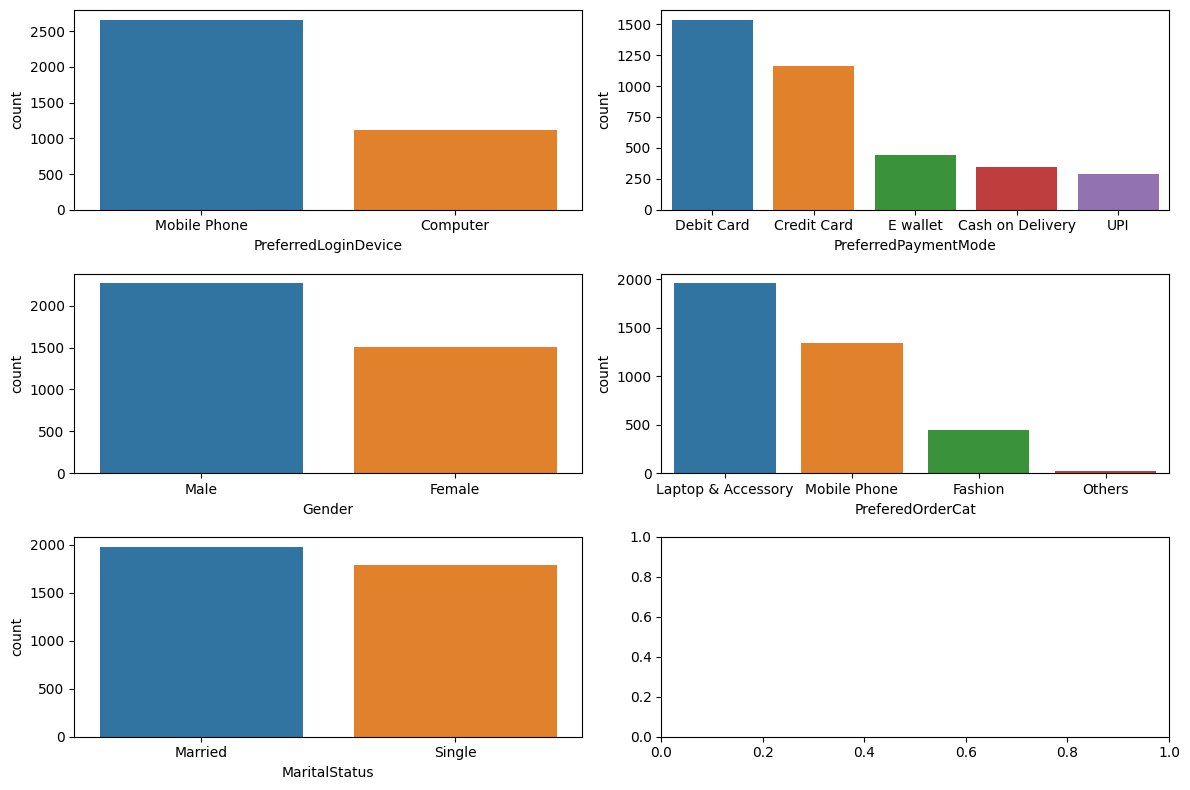

In [17]:
#Gerando novamente os gráficos depois do tratamento
import matplotlib.pyplot as plt
import seaborn as sns

fig, axarr = plt.subplots(3, 2, figsize=(12, 8))
sns.countplot(x=colunas_string[0], data = df, ax=axarr[0][0],\
              order = df[colunas_string[0]].value_counts().index)
sns.countplot(x=colunas_string[1], data = df, ax=axarr[0][1],\
              order = df[colunas_string[1]].value_counts().index)

sns.countplot(x=colunas_string[2], data = df, ax=axarr[1][0],\
              order = df[colunas_string[2]].value_counts().index)
sns.countplot(x=colunas_string[3], data = df, ax=axarr[1][1],\
              order = df[colunas_string[3]].value_counts().index)

sns.countplot(x=colunas_string[4], data = df, ax=axarr[2][0],\
              order = df[colunas_string[4]].value_counts().index)

plt.tight_layout()
plt.show()

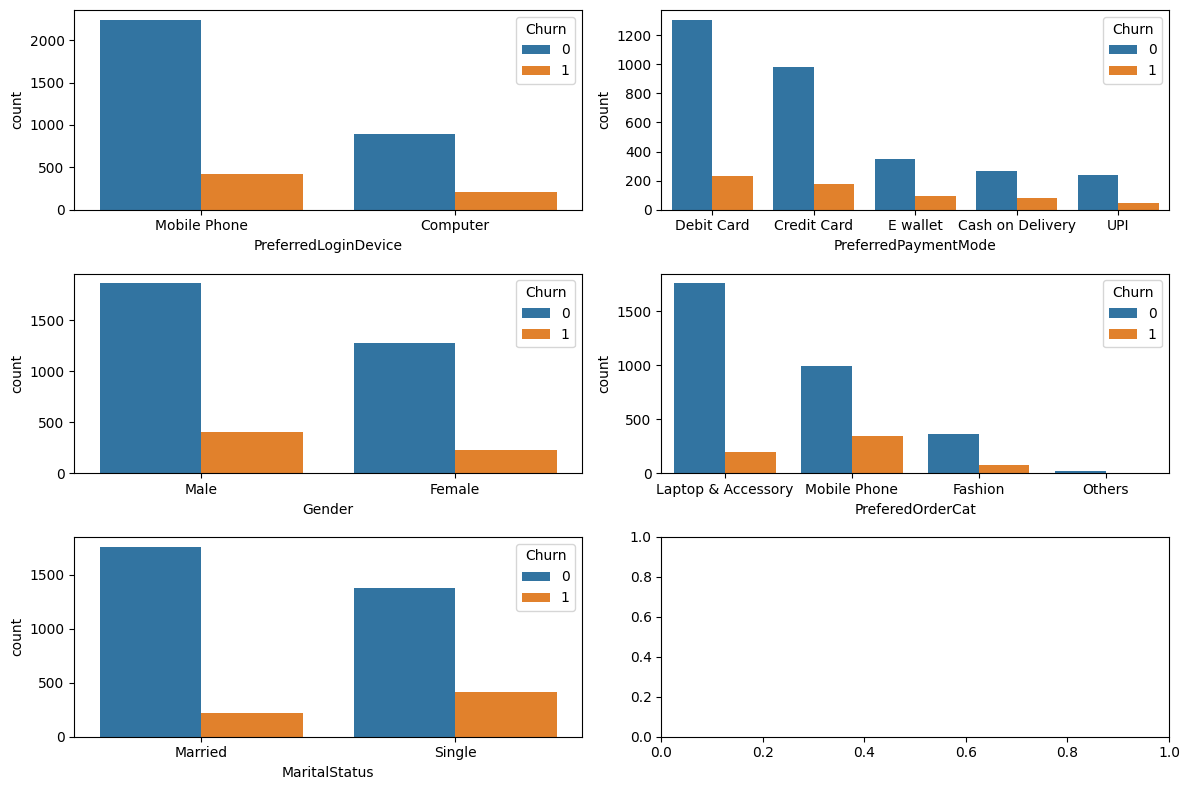

In [18]:
#Gerando novamente os gráficos depois do tratamento
fig, axarr = plt.subplots(3, 2, figsize=(12, 8))
sns.countplot(x=colunas_string[0], hue="Churn", data = df, ax=axarr[0][0],\
              order = df[colunas_string[0]].value_counts().index)
sns.countplot(x=colunas_string[1], hue="Churn", data = df, ax=axarr[0][1],\
              order = df[colunas_string[1]].value_counts().index)

sns.countplot(x=colunas_string[2], hue="Churn", data = df, ax=axarr[1][0],\
              order = df[colunas_string[2]].value_counts().index)
sns.countplot(x=colunas_string[3], hue="Churn", data = df, ax=axarr[1][1],\
              order = df[colunas_string[3]].value_counts().index)

sns.countplot(x=colunas_string[4], hue="Churn", data = df, ax=axarr[2][0],\
              order = df[colunas_string[4]].value_counts().index)

plt.tight_layout()
plt.show()

In [19]:
#Verificar a porcentagem para cada valor nessas colunas
for coluna in colunas_string:
  porcentagem_churners = ((df[coluna][df["Churn"] == 1].value_counts() / df[coluna].value_counts()) * 100).round(1)
  print(f"Coluna: '{coluna}':")
  print("Porcentagem de usuários churners:")
  print(porcentagem_churners)
  print()

Coluna: 'PreferredLoginDevice':
Porcentagem de usuários churners:
Mobile Phone    15.7
Computer        19.1
Name: PreferredLoginDevice, dtype: float64

Coluna: 'PreferredPaymentMode':
Porcentagem de usuários churners:
Debit Card          15.0
Credit Card         15.4
E wallet            21.2
Cash on Delivery    22.9
UPI                 16.8
Name: PreferredPaymentMode, dtype: float64

Coluna: 'Gender':
Porcentagem de usuários churners:
Male      17.7
Female    15.2
Name: Gender, dtype: float64

Coluna: 'PreferedOrderCat':
Porcentagem de usuários churners:
Fashion               18.1
Laptop & Accessory    10.1
Mobile Phone          25.9
Others                16.7
Name: PreferedOrderCat, dtype: float64

Coluna: 'MaritalStatus':
Porcentagem de usuários churners:
Married    11.0
Single     23.0
Name: MaritalStatus, dtype: float64



- Talvez seja interessante montar agrupamento de dados com apenas clientes que são **solteiros** ou com clientes que preferiram realizar pedidos de relacionados a "mobile" e "moda" no último mês.
- Essas categorias ficaram acima das demais na sua variável de origem, o mesmo ocorreu com os usuários de "E-wallet" e "Cash on Delivery", mas a proporção desses dentro dos métodos de pagamentos preferidos não é tão significativa.
****
- Antes de partir para as variáveis continuas, podemos verificar a relação dessas variáveis com a variável "Churn" a partir da aplicação de um **teste de qui-quadrados**. O teste de qui-quadrados determina se há uma associação significativa entre as categorias de uma variável com o churn (nesse caso).



In [20]:
from scipy.stats import chi2_contingency

for coluna in colunas_string:
  contingency_table = pd.crosstab(df['Churn'], df[coluna])
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  alpha = 0.05
  if p < alpha:
    print(f"Há associação significativa entre Churn e {coluna}.")
  else:
    print(f"Não há associação significativa entre Churn e {coluna}.")

Há associação significativa entre Churn e PreferredLoginDevice.
Há associação significativa entre Churn e PreferredPaymentMode.
Há associação significativa entre Churn e Gender.
Há associação significativa entre Churn e PreferedOrderCat.
Há associação significativa entre Churn e MaritalStatus.


**Variáveis Continuas**

In [22]:
#Puxando quais colunas são núméricas no dataset
colunas_numericas = df.select_dtypes(include=['int64']).columns
colunas_numericas = colunas_numericas.append(df.select_dtypes(include=['float64']).columns)

****
**Customer ID**
- Verificando IDs duplicados e informações repetidas na base.

In [29]:
#Verificando se existe IDs iguais na base de dados
print(f"Quantidade de ID únicos: {len(df['CustomerID'].unique())}")
print(f"Quantidade de observações da base de dados: {df.shape[0]}")

Quantidade de ID únicos: 3774
Quantidade de observações da base de dados: 3774


A princípio não existem clientes repetidos na base de dados, se utilzarmos como base o **"CustomerID"**.
Para ter certeza que não clientes iguais, vou verficar se existe na demais colunas informações iguais, podendo ter um mesmo cliente dois IDs diferentes.

In [115]:
#Verificando se existem linhas duplicadas no datafrma, sem considerar o CustomerID
df_duplicated = df.duplicated(subset=df.iloc[:, 1:], keep=False)
print(f"Existem {df_duplicated[df_duplicated==True].sum()} observações duplicadas, sem considerar o 'CustomerID'.")

Existem 752 observações duplicadas, sem considerar o 'CustomerID'.


In [118]:
#Observando algumas linhas duplicadas
pd.set_option('display.max_rows', None)
df.loc[df_duplicated].sort_values(by="Tenure").head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2405,52406,1,0.0,Computer,1,15.0,Credit Card,Male,2.0,3,Mobile Phone,5,Single,3,1,11.0,0.0,1.0,0.0,132
1557,51558,0,0.0,Computer,3,26.0,Debit Card,Female,2.0,3,Laptop & Accessory,3,Single,2,0,14.0,1.0,1.0,7.0,200
2636,52637,1,0.0,Mobile Phone,1,16.0,Credit Card,Male,2.0,3,Laptop & Accessory,5,Single,2,0,15.0,0.0,1.0,8.0,142
466,50467,1,0.0,Mobile Phone,3,22.0,E wallet,Female,3.0,3,Laptop & Accessory,5,Single,6,0,15.0,1.0,1.0,2.0,153
2635,52636,1,0.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,5,Married,5,0,17.0,0.0,1.0,7.0,153
1619,51620,0,0.0,Mobile Phone,1,9.0,Credit Card,Male,3.0,4,Mobile Phone,3,Single,2,0,17.0,1.0,1.0,0.0,132
1092,51093,0,0.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,1,Mobile Phone,3,Married,2,0,16.0,0.0,1.0,4.0,144
2575,52576,0,0.0,Mobile Phone,1,35.0,Credit Card,Male,3.0,3,Mobile Phone,5,Married,2,0,13.0,1.0,1.0,2.0,139
1718,51719,0,0.0,Mobile Phone,1,6.0,Credit Card,Male,2.0,3,Mobile Phone,4,Married,2,0,11.0,0.0,1.0,4.0,138
600,50601,1,0.0,Mobile Phone,1,20.0,UPI,Male,2.0,4,Mobile Phone,4,Married,2,1,24.0,1.0,1.0,2.0,137


- Existem algumas variáveis chaves que combinadas que nos ajudam a julgar se são usuários repetidos ou apenas um coicidência entre clientes.
- Como seria possível dois ou mais clientes terem: mesma distância entre o armázem e sua casa, número de endereços registrados, qtd de pedidos feitos, qtd dias desde a última compra e etc. iguais?
- Mesmo que seja apenas um acaso, são 752 observações que registradas como duplicadas, não teria problema em remover a "duplicadas" porque ficariamos com a 376 destas, ainda mantendo o dataframe grande.

In [120]:
#Removendo as linhas duplicadas
df.drop_duplicates(subset=df.iloc[:, 1:], keep='first', inplace=True)